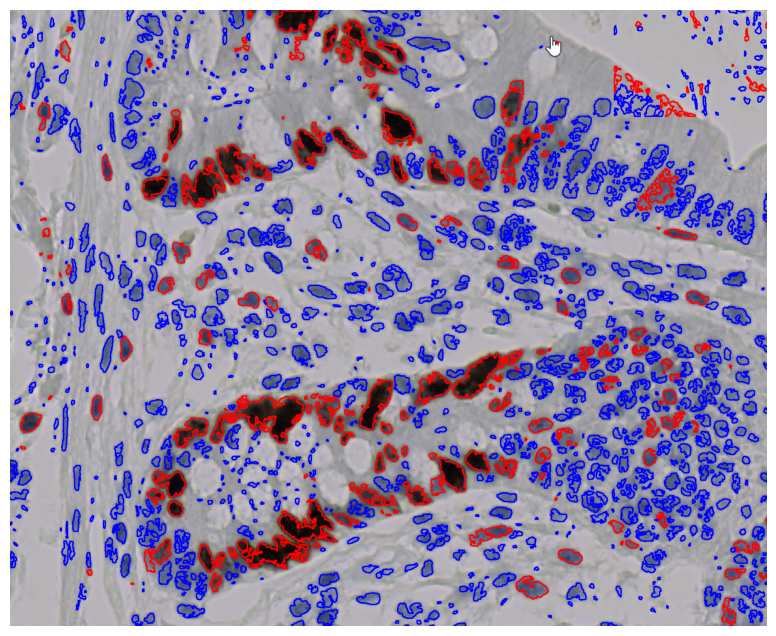

Image shape: (1388, 1704, 3)


In [1]:
# Using PIL (Pillow)
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "test/im2_SegOverlaid.png"
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

# If you need the image as a numpy array
img_array = np.array(img)
print(f"Image shape: {img_array.shape}")

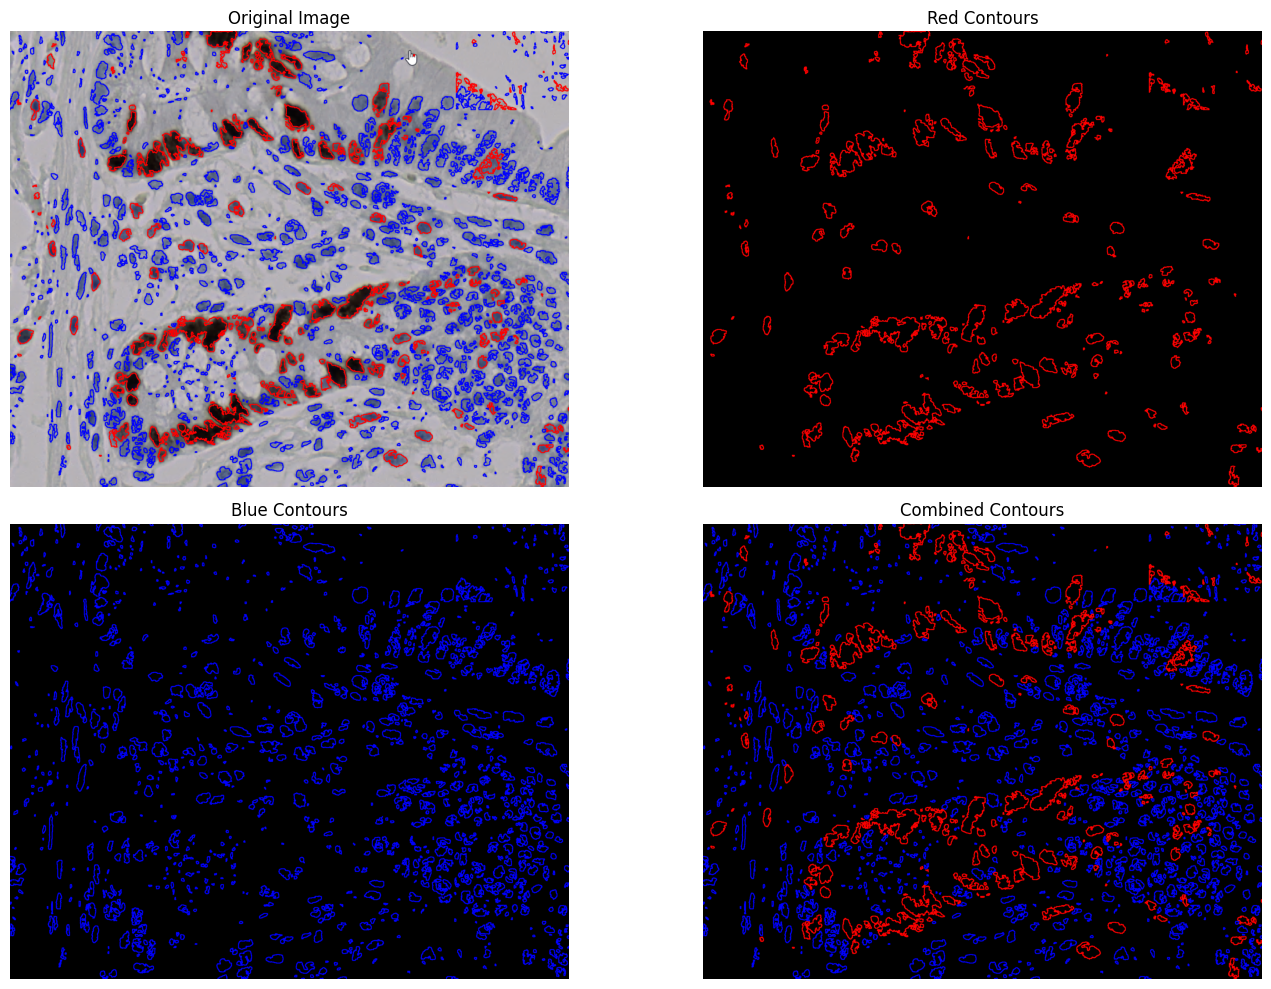

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "test/im2_SegOverlaid.png"  # Update with your actual path
img = cv2.imread(image_path)

# Convert from BGR to RGB (OpenCV loads as BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create masks for red and blue colors
# Define color ranges (you may need to adjust these based on your specific image)
lower_red = np.array([180, 0, 0])
upper_red = np.array([255, 100, 100])

lower_blue = np.array([0, 0, 180])
upper_blue = np.array([100, 100, 255])

# Create masks
red_mask = cv2.inRange(img_rgb, lower_red, upper_red)
blue_mask = cv2.inRange(img_rgb, lower_blue, upper_blue)

# Create blank images for the contours
red_contours = np.zeros_like(img_rgb)
blue_contours = np.zeros_like(img_rgb)

# Apply the masks to get only the contours
red_contours[red_mask > 0] = [255, 0, 0]  # Red color
blue_contours[blue_mask > 0] = [0, 0, 255]  # Blue color

# Combine the contours
combined_contours = red_contours + blue_contours

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Red Contours")
plt.imshow(red_contours)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Blue Contours")
plt.imshow(blue_contours)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Combined Contours")
plt.imshow(combined_contours)
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the contour images if needed
cv2.imwrite("red_contours.png", cv2.cvtColor(red_contours, cv2.COLOR_RGB2BGR))
cv2.imwrite("blue_contours.png", cv2.cvtColor(blue_contours, cv2.COLOR_RGB2BGR))
cv2.imwrite("combined_contours.png", cv2.cvtColor(combined_contours, cv2.COLOR_RGB2BGR))

In [3]:
red_contours, blue_contours



(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], shape=(1388, 1704, 3), dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 

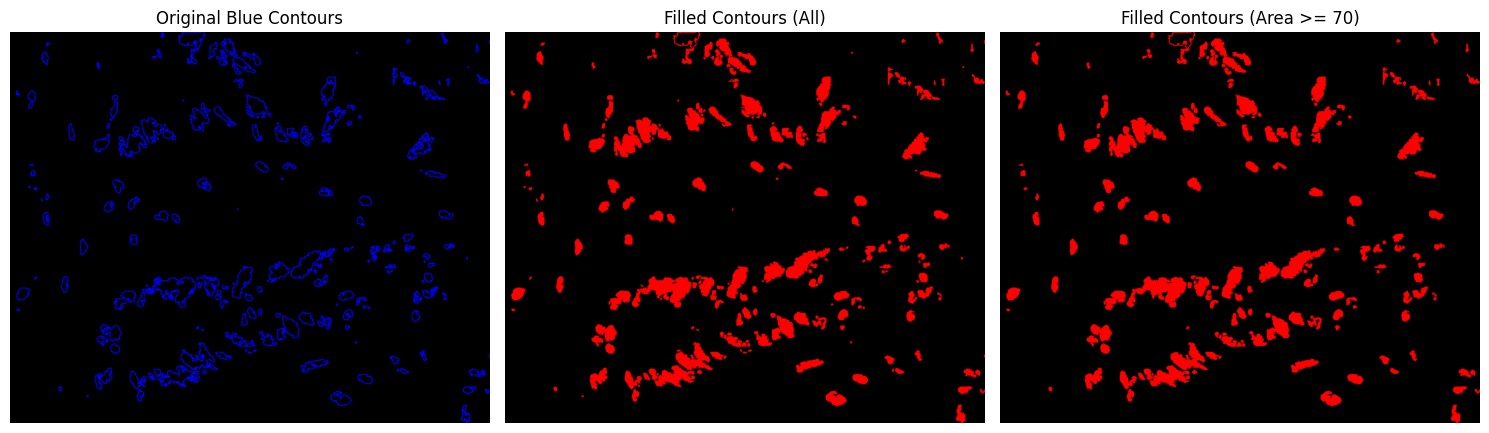

Total contours found: 198
Contours after filtering: 154
Removed 44 small contours


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the blue contours image
# blue_contours_path = "blue_contours.png"  # Update with your actual path
# blue_contours_img = cv2.imread(blue_contours_path)

# Convert to grayscale for contour detection
gray = cv2.cvtColor(red_contours, cv2.COLOR_BGR2GRAY)

# Find contours
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw filled contours
filled_contours = np.zeros_like(red_contours)

# Set minimum contour area threshold (adjust as needed)
min_contour_area = 70  # Filter out contours smaller than this area

# Fill and filter contours
filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area >= min_contour_area:
        filtered_contours.append(contour)
        cv2.drawContours(filled_contours, [contour], -1, (0, 0, 255), -1)  # -1 thickness means fill

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Blue Contours")
plt.imshow(cv2.cvtColor(red_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Filled Contours (All)")
all_filled = np.zeros_like(red_contours)
cv2.drawContours(all_filled, contours, -1, (0, 0, 255), -1)
plt.imshow(cv2.cvtColor(all_filled, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Filled Contours (Area >= {min_contour_area})")
plt.imshow(cv2.cvtColor(filled_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the filled and filtered contours
cv2.imwrite("filled_filtered_blue_contours.png", filled_contours)

# Print statistics
print(f"Total contours found: {len(contours)}")
print(f"Contours after filtering: {len(filtered_contours)}")
print(f"Removed {len(contours) - len(filtered_contours)} small contours")

In [7]:
def extract_contours(path):
    image_path = "test/im2_SegOverlaid.png"  # Update with your actual path
    img = cv2.imread(image_path)

    # Convert from BGR to RGB (OpenCV loads as BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create masks for red and blue colors
    # Define color ranges (you may need to adjust these based on your specific image)
    lower_red = np.array([180, 0, 0])
    upper_red = np.array([255, 100, 100])

    lower_blue = np.array([0, 0, 180])
    upper_blue = np.array([100, 100, 255])

    # Create masks
    red_mask = cv2.inRange(img_rgb, lower_red, upper_red)
    blue_mask = cv2.inRange(img_rgb, lower_blue, upper_blue)

    # Create blank images for the contours
    red_contours = np.zeros_like(img_rgb)
    blue_contours = np.zeros_like(img_rgb)

    # Apply the masks to get only the contours
    red_contours[red_mask > 0] = [255, 0, 0]  # Red color
    blue_contours[blue_mask > 0] = [0, 0, 255]  # Blue color

    return red_contours, blue_contours

In [27]:
def create_mask(contours, color):
    gray = cv2.cvtColor(contours, cv2.COLOR_BGR2GRAY)

    # Find contours
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image to draw filled contours
    filled_contours = np.zeros_like(red_contours)

    # Set minimum contour area threshold (adjust as needed)
    min_contour_area = 70  # Filter out contours smaller than this area

    # Fill and filter contours
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >= min_contour_area:
            filtered_contours.append(contour)
            cv2.drawContours(filled_contours, [contour], -1, color, -1)  # -1 thickness means fill

    num_contours = len(filtered_contours)

    return filled_contours, num_contours

In [25]:
def merge_pred_masks(negative_mask, positive_mask):
    # Create a blank binary mask with zeros (background)
    binary_mask = np.zeros((negative_mask.shape[0], negative_mask.shape[1]), dtype=np.uint8)
    
    # Set positive cells to 1
    # Extract red channel from positive_mask and create binary mask
    positive_binary = (positive_mask[:,:,0] > 0).astype(np.uint8)
    binary_mask[positive_binary > 0] = 1
    
    # Set negative cells to 2
    # Extract blue channel from negative_mask and create binary mask
    negative_binary = (negative_mask[:,:,2] > 0).astype(np.uint8)
    binary_mask[negative_binary > 0] = 2
    
    return binary_mask


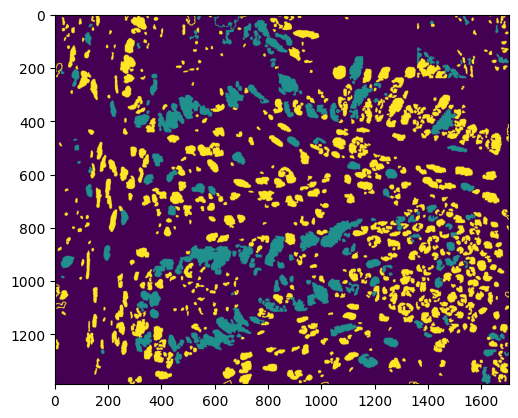

In [28]:
path = "test/im2_SegOverlaid.png"
red_contours, blue_contours = extract_contours(path)
negative_filled_contours, num_negative_contours = create_mask(blue_contours, (0, 0, 255))
positive_filled_contours, num_positive_contours = create_mask(red_contours, (255, 0, 0))

merged_pred_masks = merge_pred_masks(negative_filled_contours, positive_filled_contours)
plt.imshow(merged_pred_masks)

In [30]:
num_positive_contours

154